In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
img = cv2.imread('/content/rubiks.jpg',0)

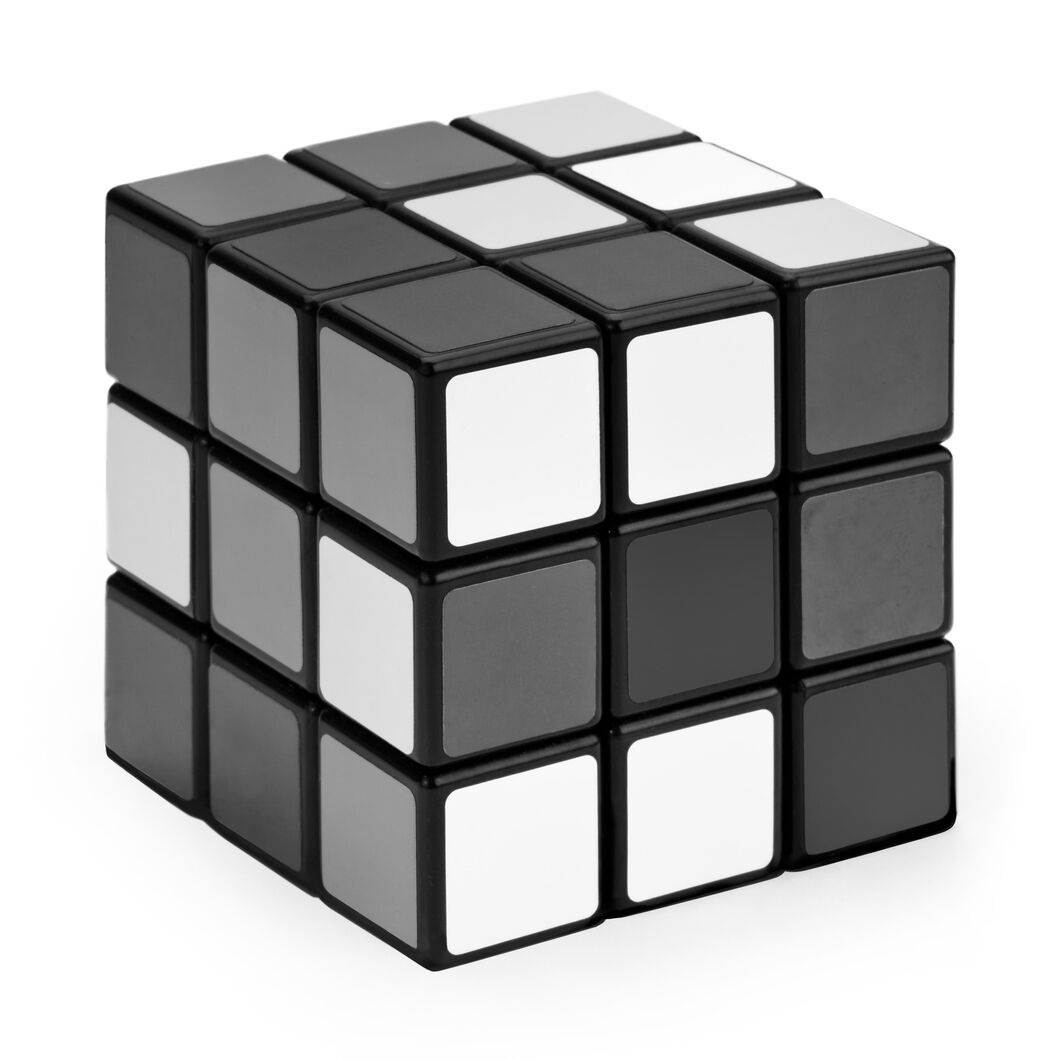

In [ ]:
cv2_imshow(img)

In [ ]:
row,col = img.shape

In [ ]:
H = np.zeros((row,col),dtype=np.float32)

In [ ]:
Do = 50

**Filter Ideal Low pass**

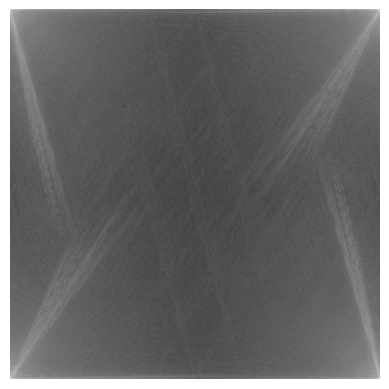

In [ ]:
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

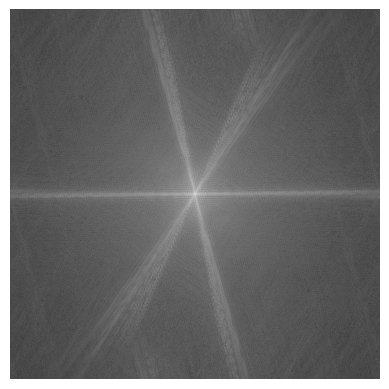

In [ ]:
Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
for u in range(row):
  for v in range(col):
    D = np.sqrt((u-row/2)**2 + (v-col/2)**2)
    if D<=Do:
      H[u,v] = 1
    else:
      H[u,v] = 0

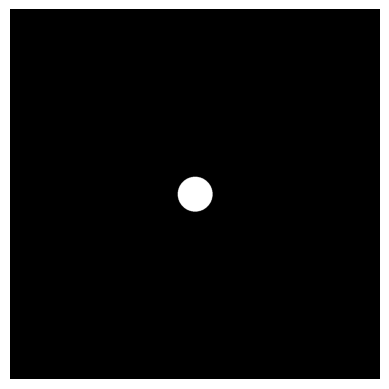

In [ ]:
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

**Ideal Low Pass Filtering**

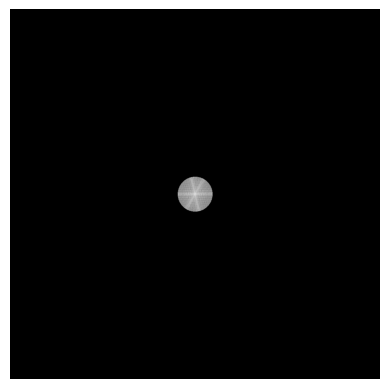

In [ ]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show() 

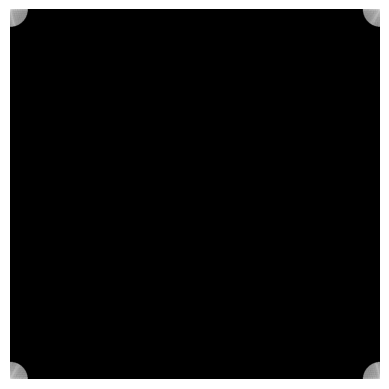

In [ ]:
#Inverse Fourier Transformation
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

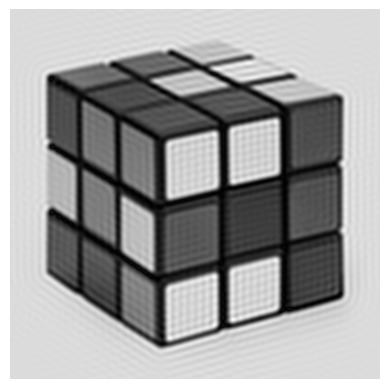

In [ ]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

**Filter High pass Filter**

In [ ]:
H = 1-H

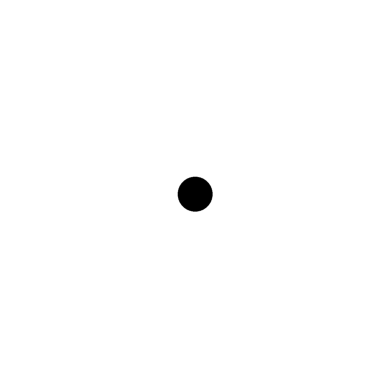

In [ ]:
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

**Ideal High pass Filter**

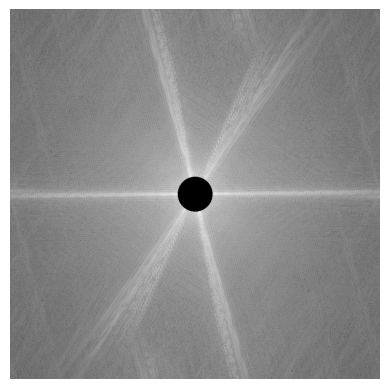

In [ ]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

**Inverse Fourier Transformation**

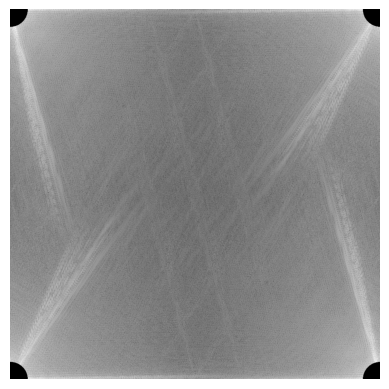

In [ ]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

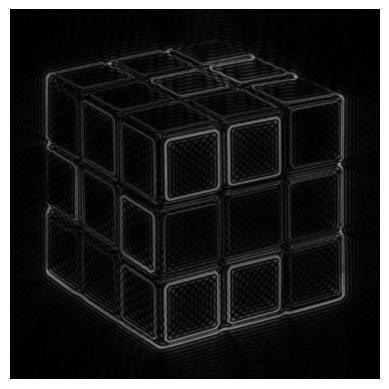

In [ ]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()